In [1]:

from googleapiclient.discovery import build
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


Leyendo la info consignada en la página oficial de la API youtube indican cómo se hacen las peticiones y cómo puedo obtener las playlist de un canal por lo que el código a continuación tiene partes de lo que está consignado en la página oficial
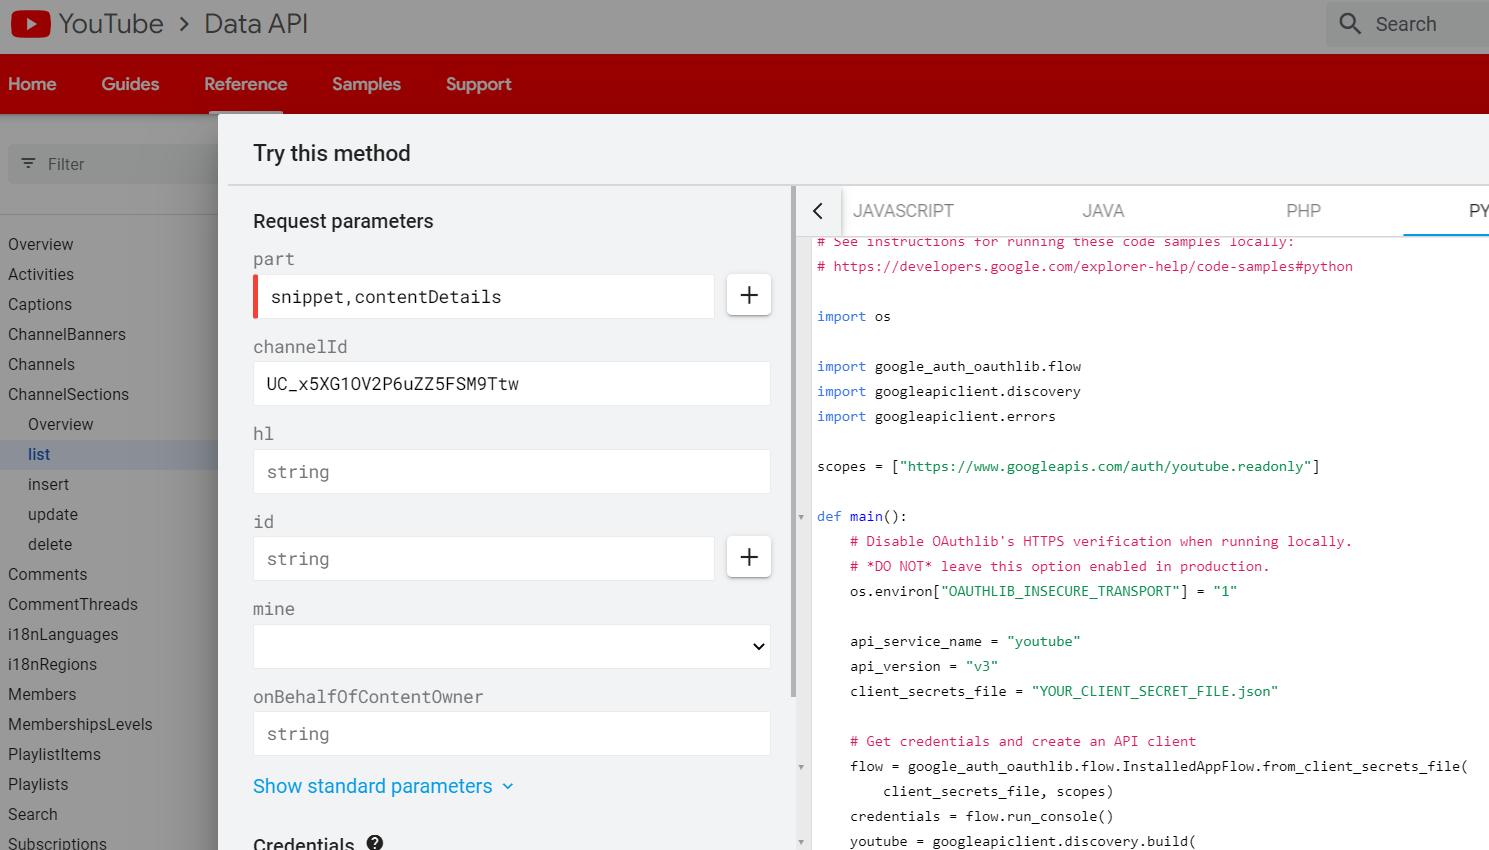


In [2]:
api_key = 'I'
channel_id = ['UCnJjcn5FrgrOEp5_N45ZLEQ']
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [3]:
def playlist(youtube, channel_id):
    
    info = []
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_id)
    )
    response = request.execute()

    # loop through items
    for item in response['items']:
        data = {'nombre_canal': item['snippet']['title'],
                'subs': item['statistics']['subscriberCount'],
                'vistas': item['statistics']['viewCount'],
                'total_videos': item['statistics']['videoCount'],
                'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
        }
        
        info.append(data)
        
    return pd.DataFrame(info)

In [4]:
desc = playlist(youtube, channel_id)
desc

,nombre_canal,subs,vistas,total_videos,playlistId
0,T-Series Telugu,8010000,5490422096,5636,UUnJjcn5FrgrOEp5_N45ZLEQ


In [5]:
def get_video_ids(youtube, playlist_id):
    
    video_ids = []
    
    request = youtube.playlistItems().list(part="snippet,contentDetails",playlistId=playlist_id,
                                           maxResults = 50)
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
                    part='contentDetails',
                    playlistId = playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')
        
    return video_ids

In [57]:
playlist_id = "UUnJjcn5FrgrOEp5_N45ZLEQ"
# Get video IDs
video_ids = get_video_ids(youtube, playlist_id)

all_video_info = []

for i in range(0, len(video_ids), 50):
    request = youtube.videos().list(part="snippet,contentDetails,statistics",
                                    id=','.join(video_ids[i:i+50]))
    response = request.execute() 
    
    for video in response['items']:
        stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                         'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
        video_info = {}
        video_info['video_id'] = video['id']
        
        for k in stats_to_keep.keys():
            for v in stats_to_keep[k]:
                try:
                    video_info[v] = video[k][v]
                except:
                    video_info[v] = None

        all_video_info.append(video_info)
    
inff=pd.DataFrame(all_video_info)

In [58]:
inff

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,Toa5iZ7EXx8,T-Series Telugu,Legendary Director K Raghavendra Rao Evergreen...,T-Series Telugu presents Legendary Director K...,"[Telugu New song, Telugu Songs, New Songs, Lah...",2023-05-23T10:30:08Z,3106,42,None,3,PT1H18M17S,hd,false
1,TQlvVCGYsd8,T-Series Telugu,Masthugunnadi Song | Balaram Krishndu Movie | ...,T-Series Telugu presents Masthugunnadi Song fr...,"[Telugu New song, Telugu Songs, New Songs, Lah...",2023-05-23T06:56:01Z,1944,26,None,1,PT4M58S,hd,false
2,g0pyevo-8AI,T-Series Telugu,"Full Album: Agent Jukebox | Akhil Akkineni,Mam...",Listen to #Agent New Telugu Movie Audio Songs ...,"[AGENT Teaser, agent trailer, agent telugu tea...",2023-05-22T12:33:00Z,1933,35,None,2,PT15M,hd,false
3,SbST8L8nLFo,T-Series Telugu,Minimum Song - Lyrical | Mem Famous | Sumanth ...,T-Series Telugu presents Minimum Song Lyrical...,"[mem famous teaser, #MemFamous, mem famous son...",2023-05-22T06:42:40Z,13035,607,None,13,PT3M2S,hd,false
4,RxGNf8rO_UY,T-Series Telugu,Paga Paga Song | Balaram Krishndu Movie | Jaga...,T-Series Telugu presents Paga Paga Song from B...,"[Telugu New song, Telugu Songs, Songs Telugu, ...",2023-05-22T05:32:24Z,2432,30,None,4,PT4M33S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633,JA0IATvkSnc,T-Series Telugu,"Ee Pichhey Premani Song - Palak Muchhal, Sree ...",Song: Ee Pichhey Premani\nMovie: Nee Jathaga N...,"[nee jathaga nenundali, nee jathaga nenundali ...",2014-06-18T09:52:33Z,61042,410,None,32,PT5M8S,hd,false
5634,4l-5-S9vbkw,T-Series Telugu,Vintunnava Nestham Song - Ankit Tiwari - Nee J...,Song: Vintunnava Nestham\nMovie: Nee Jathaga N...,"[nee jathaga nenundali, nee jathaga nenundali ...",2014-06-18T08:30:27Z,91850,362,None,40,PT6M32S,hd,false
5635,S6vWMnX4d_w,T-Series Telugu,Pranama Na Pranama Song - Arijit Singh - Nee J...,Song: Pranama Na Pranama\nMovie: Nee Jathaga N...,"[nee jathaga nenundali, nee jathaga nenundali ...",2014-06-18T08:23:05Z,1873683,13022,None,826,PT4M23S,hd,false
5636,lFceRGt15Lg,T-Series Telugu,Nee Jathaga Nenundaali Full Songs (Jukebox) | ...,PRANAMA NA PRANAMA - (00:01)\nVINTUNNAVA NESTH...,"[nee jathaga nenundali, nee jathaga nenundali ...",2014-06-17T10:15:12Z,2715664,12693,None,977,PT45M53S,hd,false


In [83]:
inff["publishedAt"]=str(fech).split("T")[0] #La verdad no entiendo por qué no funcionó, 
#mi idea era quitar todo lo que fuera despues de la T pero incluso se agregan cosas a la fecha 
inff

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,durationSecs
0,Toa5iZ7EXx8,T-Series Telugu,Legendary Director K Raghavendra Rao Evergreen...,T-Series Telugu presents Legendary Director K...,"[Telugu New song, Telugu Songs, New Songs, Lah...","['0 2023-05-23', '10:30:08Z\n1 202...",3106.0,42.0,None,3.0,PT1H18M17S,hd,false,4697.0
1,TQlvVCGYsd8,T-Series Telugu,Masthugunnadi Song | Balaram Krishndu Movie | ...,T-Series Telugu presents Masthugunnadi Song fr...,"[Telugu New song, Telugu Songs, New Songs, Lah...","['0 2023-05-23', '10:30:08Z\n1 202...",1944.0,26.0,None,1.0,PT4M58S,hd,false,298.0
2,g0pyevo-8AI,T-Series Telugu,"Full Album: Agent Jukebox | Akhil Akkineni,Mam...",Listen to #Agent New Telugu Movie Audio Songs ...,"[AGENT Teaser, agent trailer, agent telugu tea...","['0 2023-05-23', '10:30:08Z\n1 202...",1933.0,35.0,None,2.0,PT15M,hd,false,900.0
3,SbST8L8nLFo,T-Series Telugu,Minimum Song - Lyrical | Mem Famous | Sumanth ...,T-Series Telugu presents Minimum Song Lyrical...,"[mem famous teaser, #MemFamous, mem famous son...","['0 2023-05-23', '10:30:08Z\n1 202...",13035.0,607.0,None,13.0,PT3M2S,hd,false,182.0
4,RxGNf8rO_UY,T-Series Telugu,Paga Paga Song | Balaram Krishndu Movie | Jaga...,T-Series Telugu presents Paga Paga Song from B...,"[Telugu New song, Telugu Songs, Songs Telugu, ...","['0 2023-05-23', '10:30:08Z\n1 202...",2432.0,30.0,None,4.0,PT4M33S,hd,false,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633,JA0IATvkSnc,T-Series Telugu,"Ee Pichhey Premani Song - Palak Muchhal, Sree ...",Song: Ee Pichhey Premani\nMovie: Nee Jathaga N...,"[nee jathaga nenundali, nee jathaga nenundali ...","['0 2023-05-23', '10:30:08Z\n1 202...",61042.0,410.0,None,32.0,PT5M8S,hd,false,308.0
5634,4l-5-S9vbkw,T-Series Telugu,Vintunnava Nestham Song - Ankit Tiwari - Nee J...,Song: Vintunnava Nestham\nMovie: Nee Jathaga N...,"[nee jathaga nenundali, nee jathaga nenundali ...","['0 2023-05-23', '10:30:08Z\n1 202...",91850.0,362.0,None,40.0,PT6M32S,hd,false,392.0
5635,S6vWMnX4d_w,T-Series Telugu,Pranama Na Pranama Song - Arijit Singh - Nee J...,Song: Pranama Na Pranama\nMovie: Nee Jathaga N...,"[nee jathaga nenundali, nee jathaga nenundali ...","['0 2023-05-23', '10:30:08Z\n1 202...",1873683.0,13022.0,None,826.0,PT4M23S,hd,false,263.0
5636,lFceRGt15Lg,T-Series Telugu,Nee Jathaga Nenundaali Full Songs (Jukebox) | ...,PRANAMA NA PRANAMA - (00:01)\nVINTUNNAVA NESTH...,"[nee jathaga nenundali, nee jathaga nenundali ...","['0 2023-05-23', '10:30:08Z\n1 202...",2715664.0,12693.0,None,977.0,PT45M53S,hd,false,2753.0


In [59]:
inff.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [60]:
# Check data types
inff.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [45]:
#pip install isodate 
#esto nos ayuda a correguir el formato de el tiempo que usa youtube y pasarlo a segundos

In [61]:
numeric_cols = ['viewCount', 'likeCount', 'commentCount']
inff[numeric_cols] = inff[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

import isodate
inff['durationSecs'] = inff['duration'].apply(lambda x: isodate.parse_duration(x))
inff['durationSecs'] = inff['durationSecs'].astype('timedelta64[s]')
inff[['durationSecs', 'duration']] 

,durationSecs,duration
0,4697.0,PT1H18M17S
1,298.0,PT4M58S
2,900.0,PT15M
3,182.0,PT3M2S
4,273.0,PT4M33S
...,...,...
5633,308.0,PT5M8S
5634,392.0,PT6M32S
5635,263.0,PT4M23S
5636,2753.0,PT45M53S


Text(0.5, 1.0, 'Videos más vistos')

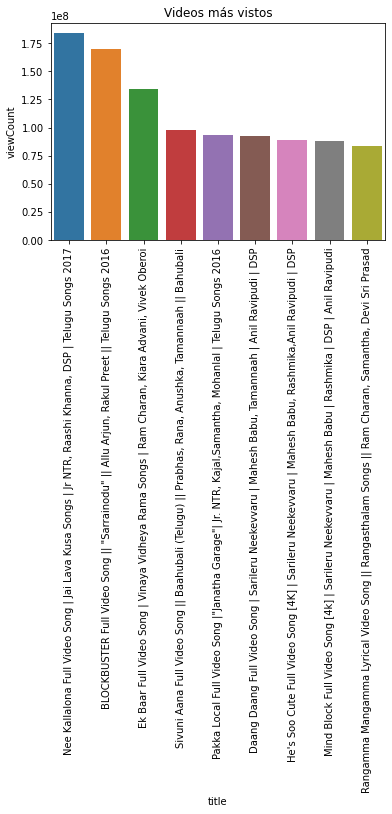

In [62]:

ax = sns.barplot(x = 'title', y = 'viewCount', data = inff.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Videos más vistos")

Text(0.5, 1.0, 'Videos con menos vistas')

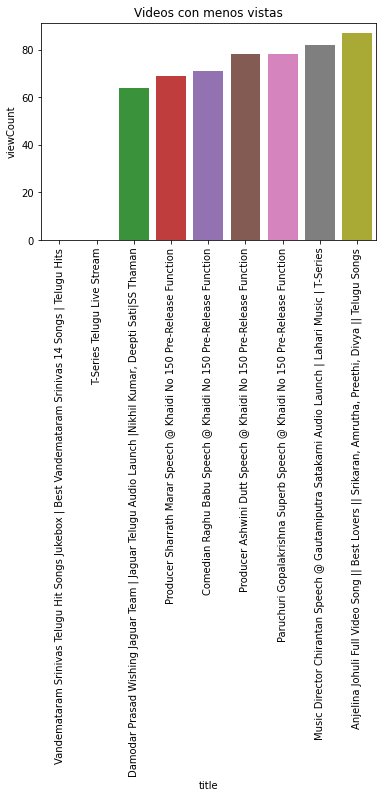

In [64]:
ax = sns.barplot(x = 'title', y = 'viewCount', data = inff.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Videos con menos vistas")

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

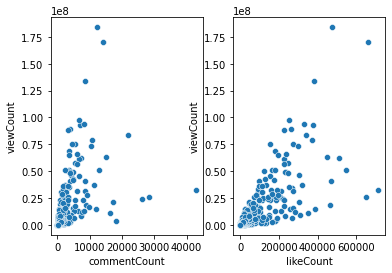

In [65]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = inff, x = 'commentCount', y = 'viewCount', ax = ax[0])
sns.scatterplot(data = inff, x = 'likeCount', y = 'viewCount', ax = ax[1])

<AxesSubplot:xlabel='durationSecs', ylabel='Count'>

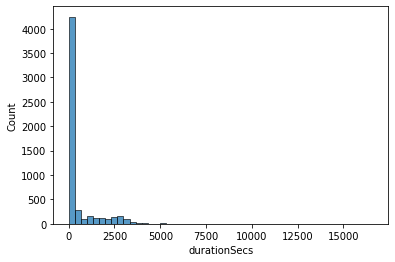

In [69]:
sns.histplot(data = inff, x = 'durationSecs', bins=)
